# Paul trap simulation

> Sebastian Löfgren
>
> Ricardo Méndez-Fragoso
>
> Jonas Enger

Explanation text

In [1]:
#@title
from pylab import *
from scipy.integrate import *


def nu2q(nu):
    g , h , R = 9810 , 30 , 54 # default parameters for the trap
    p=(g*h)/(R*R)
    omega = 2*pi*nu
    return p/(omega**2)

def draw_simulation_trajectory(x_sol,y_sol,rho=40):
    fig, ax = plt.subplots(dpi=150)
    ax.plot(x_sol,y_sol)
    ax.plot(x_sol[0],y_sol[0],'o')
    th = linspace(0,2*pi)
    x_c , y_c = rho*cos(th) , rho*sin(th)
    ax.plot(x_c,y_c,'--',color='tab:red')
    ax.grid(),title("Trajectory"),xlabel(r"$x$ (mm)"),ylabel(r"$y$ (mm)")
    lim = rho + 10
    ax.set_xlim([-lim,lim]),ax.set_ylim([-lim,lim])
    ax.set_aspect('equal')
    show()

def initial_cond():
    print("Welcome \U0001F600 \t (version 0.9.1)")
    print('Enter the initial values for x and y')
    x_ini = float(input('\t x = '))
    y_ini = float(input('\t y = '))
    return x_ini , y_ini

def rot_saddle_trap_ode_x_y(t,x,q=0.5):
    # x = x , vx , y , vy
    dx , dy = x[1] , x[3]
    dvx = -2*q*(x[0]*cos(2*t) + x[2]*sin(2*t))
    dvy = 2*q*(x[2]*cos(2*t) - x[0]*sin(2*t))
    return array([dx,dvx,dy,dvy])

def fall_condition(t,x):
    return sqrt(x[0]**2 + x[2]**2) > 40
fall_condition.terminal = True

def run_simulation(freq=3):
    x_ini,y_ini = initial_cond()
    ini_p = [x_ini,0.0,y_ini,0.0] # format ini_p = x , vx , y , vy
    t = (0,300)
    my_q = nu2q(freq)
    xy_sol = solve_ivp(rot_saddle_trap_ode_x_y,t,ini_p,args=(my_q,),method='LSODA',dense_output=True,rtol=1e-8,atol=1e-8)
    if xy_sol.success == True:
        print("I have the solution for the entered values")
    else:
        print("I don't have the solution for the entered values")
    t_cont = linspace(0,xy_sol.t[-1],5000)
    x_sol , y_sol = xy_sol.sol(t_cont)[0,:] , xy_sol.sol(t_cont)[2,:]
    draw_simulation_trajectory(x_sol , y_sol)

Welcome 😀 	 (version 0.9.1)
Enter the initial values for x and y


	 x =  20
	 y =  20


I have the solution for the entered values


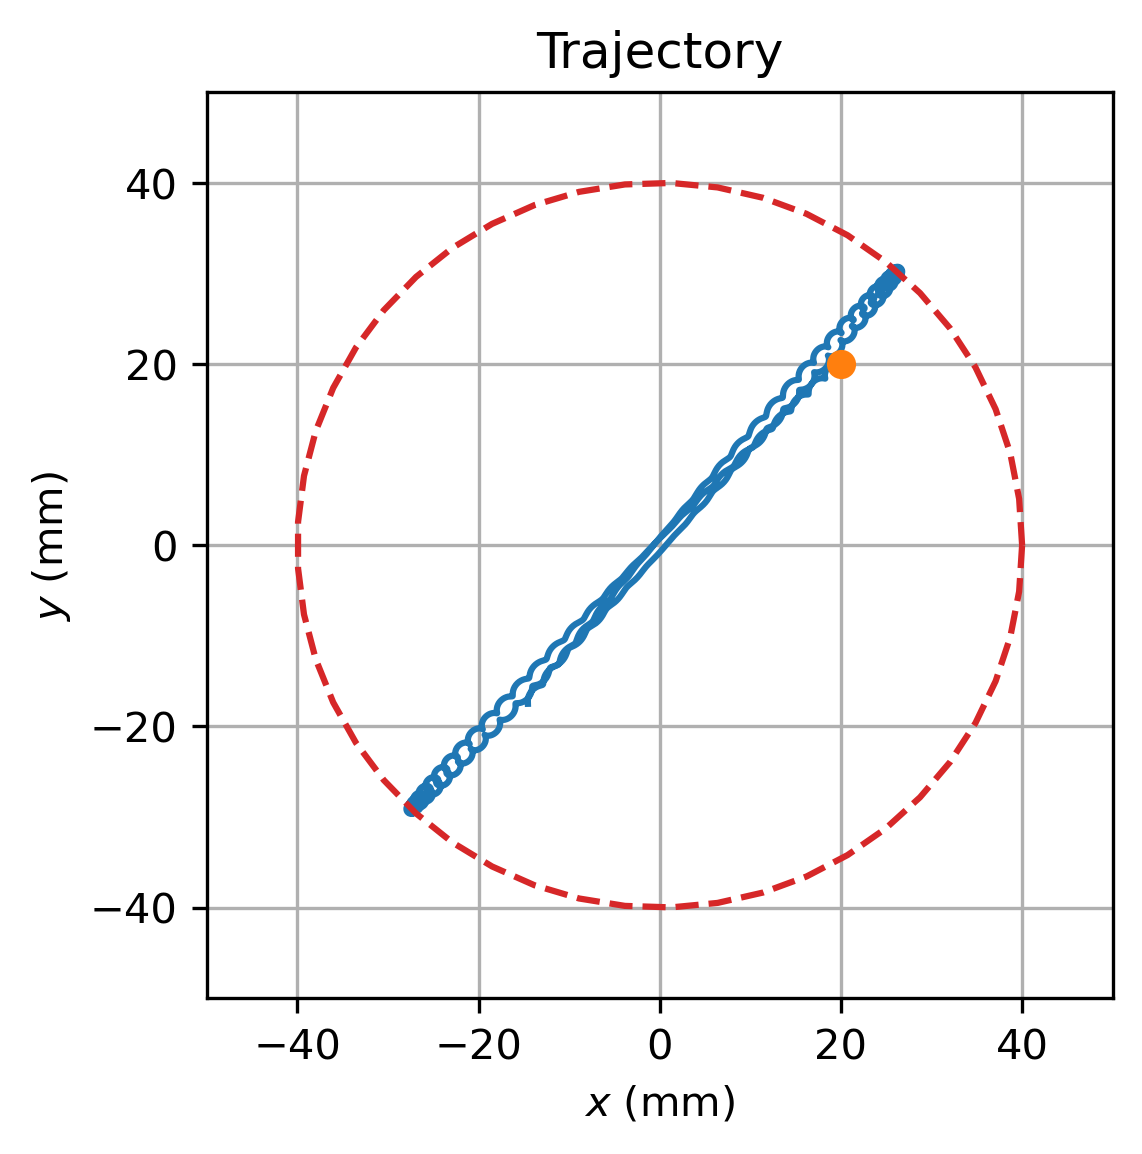

In [8]:
run_simulation(10)